<a href="https://www.kaggle.com/code/skylarsavar/product-advertising-impact-analysis?scriptVersionId=160187420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objective 

Explore the different advertising channels and the resulting product sales. I aim to investigate the impact of advertising on sales.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/product-advertising-data/Advertising_Data.csv')

# Explore Dataframe

In [3]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [4]:
df.describe

<bound method NDFrame.describe of          TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0    281.42      538.80      123.94        349.30                242.77   
1    702.97      296.53      558.13        180.55                781.06   
2    313.14      295.94      642.96        505.71                438.91   
3    898.52       61.27      548.73        240.93                278.96   
4    766.52      550.72      651.91        666.33                396.33   
..      ...         ...         ...           ...                   ...   
295  770.05      501.36      694.60        172.26                572.26   
296  512.38      250.83      373.78        366.95                987.14   
297  998.10      858.75      781.06         60.61                174.63   
298  322.35      681.22      640.29        343.65                534.22   
299  476.45      884.77      301.79        802.30                434.82   

     Affiliate_Marketing  Product_Sold  
0                 910.10

In [5]:
df.shape

(300, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [7]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

# Data Cleaning 

In [8]:
# Check for nulls
df.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

In [9]:
# Check for duplicates

df_dups = df[df.duplicated()]

In [10]:
df_dups

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold


# Analysis and Correlation

In [11]:
df.corr()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.028851,0.025265,-0.038993,0.009970,0.087524,0.374228
Billboards,-0.028851,1.000000,0.052991,0.048722,-0.005815,-0.041060,0.480593
Google_Ads,0.025265,0.052991,1.000000,0.040265,-0.059243,-0.131834,0.203678
Social_Media,-0.038993,0.048722,0.040265,1.000000,-0.042679,-0.019522,0.401088
Influencer_Marketing,0.009970,-0.005815,-0.059243,-0.042679,1.000000,-0.047093,0.140844
Affiliate_Marketing,0.087524,-0.041060,-0.131834,-0.019522,-0.047093,1.000000,0.611603
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.000000


<Axes: >

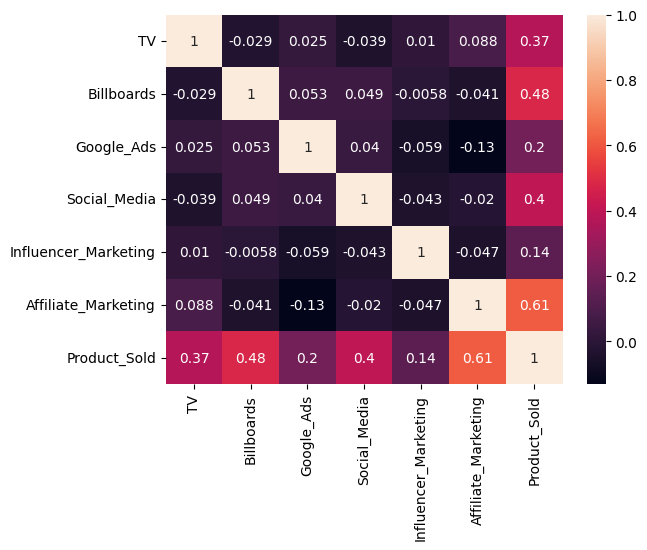

In [12]:
sns.heatmap(df.corr(), annot=True)

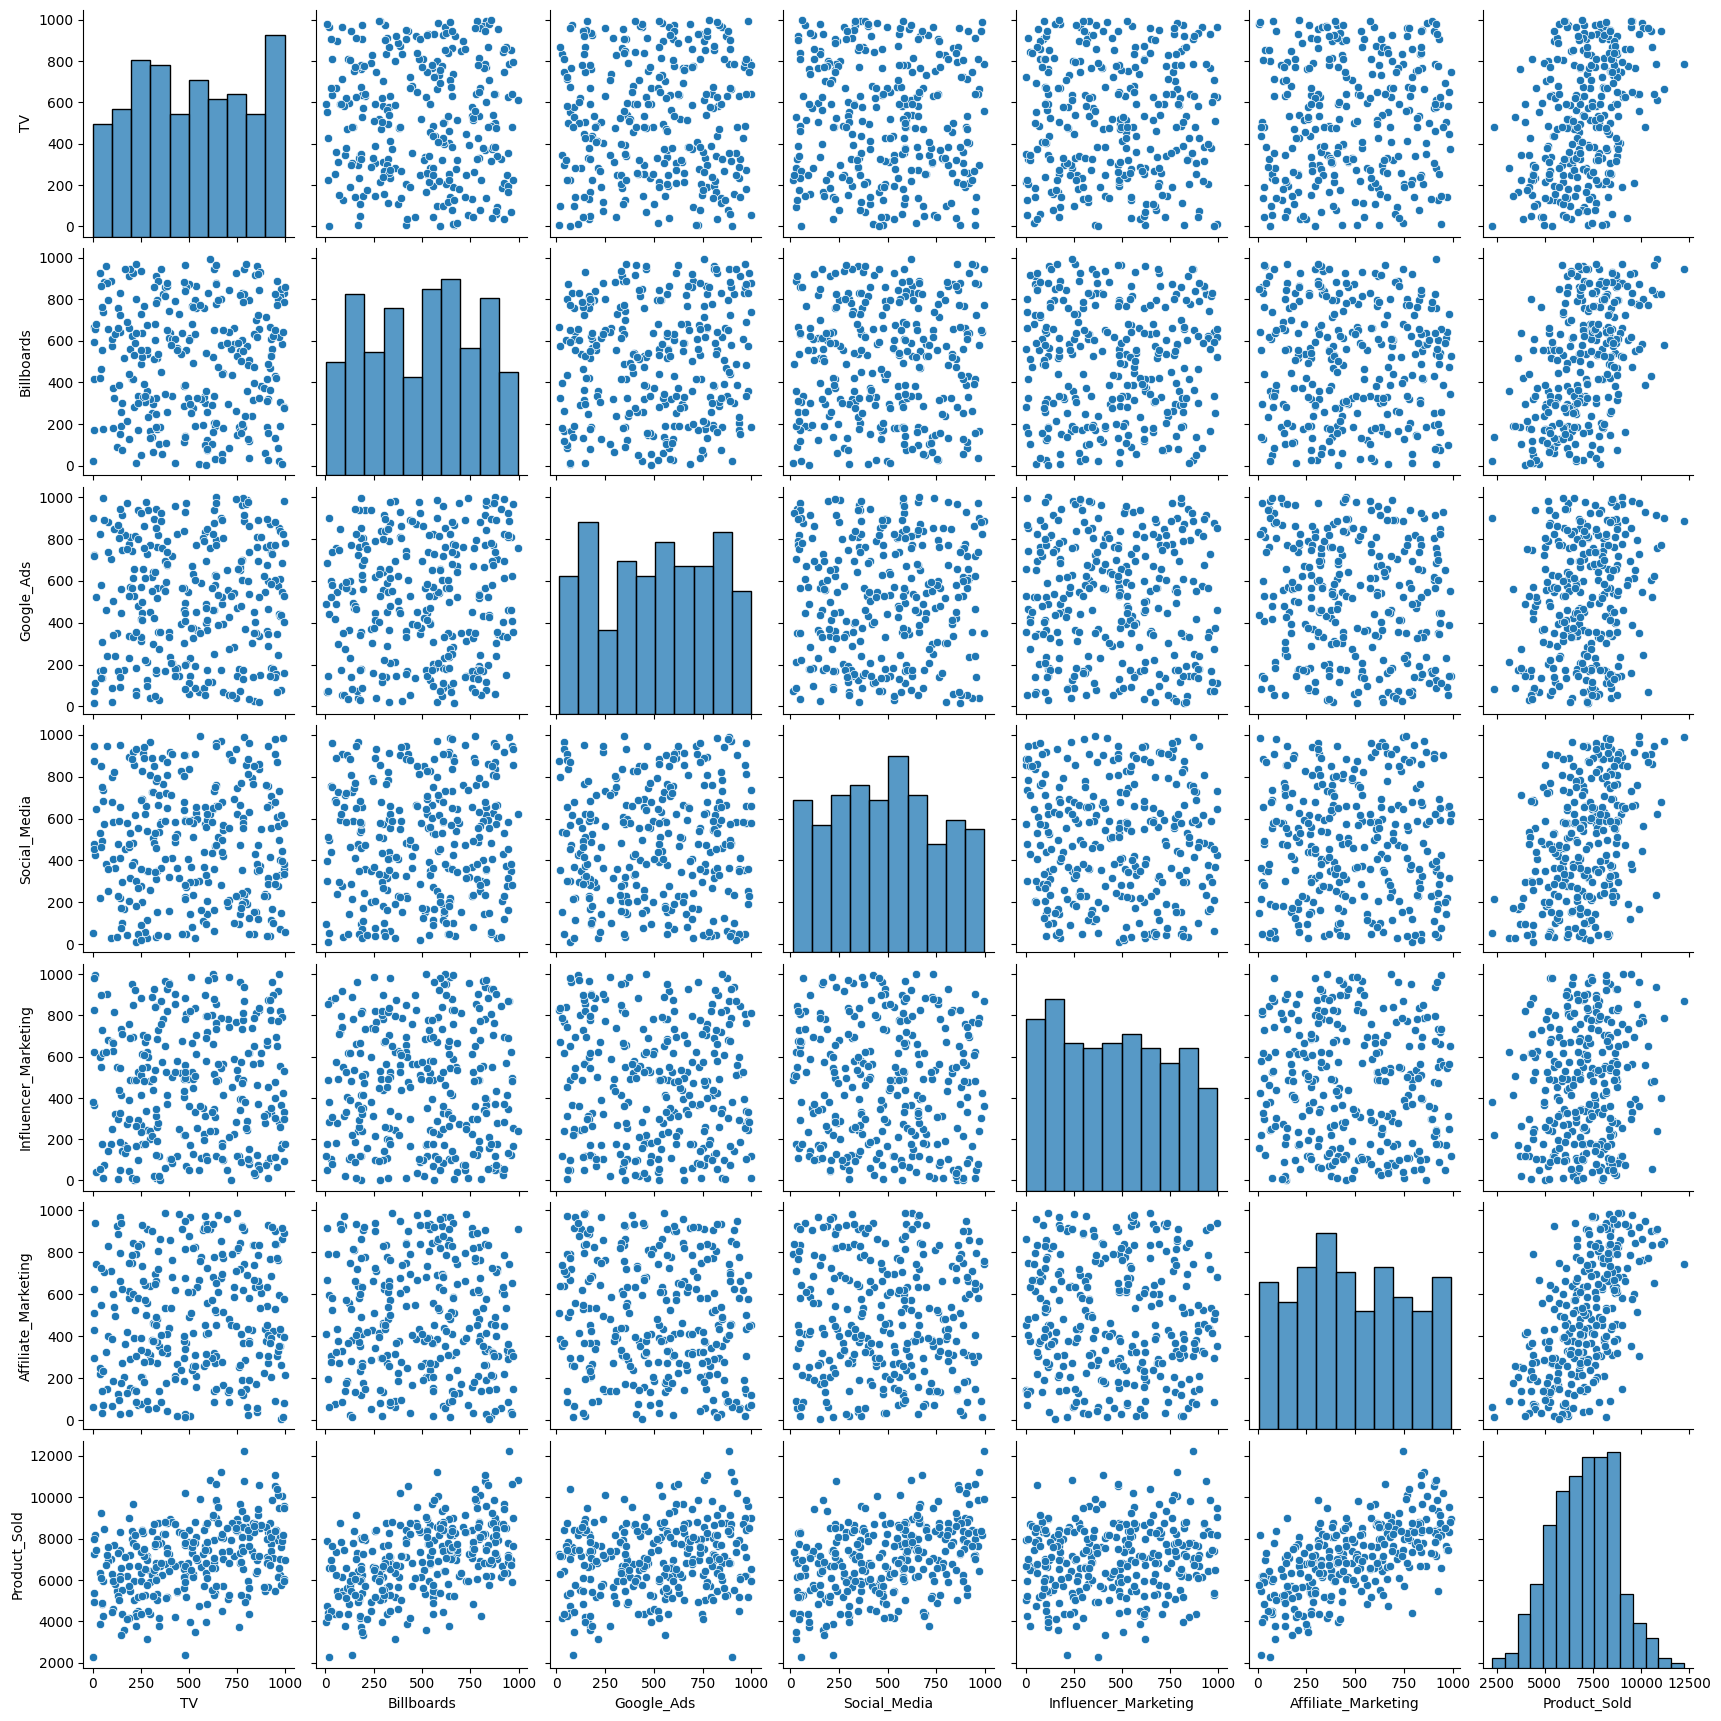

In [13]:
sns.pairplot(df)

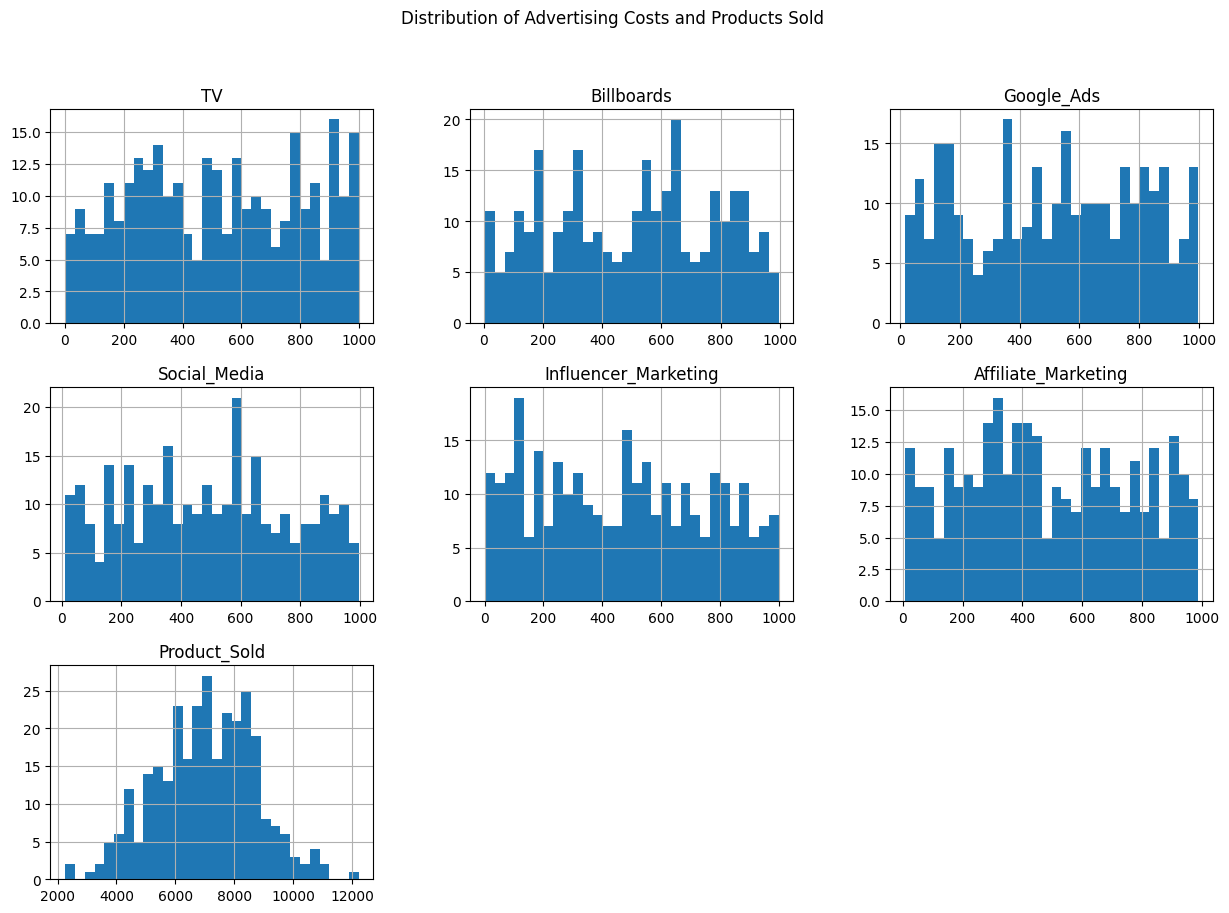

In [14]:
# Histogram of Advertising Costs vs Products Sold 

df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Advertising Costs and Products Sold")
plt.show()

<Axes: xlabel='Product_Sold', ylabel='Affiliate_Marketing'>

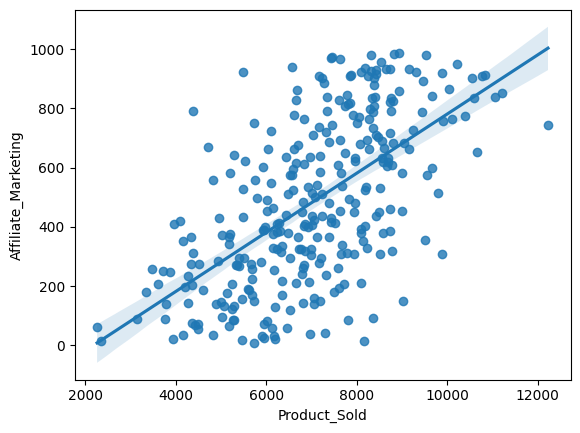

In [15]:
sns.regplot(x = "Product_Sold", y = "Affiliate_Marketing", data = df)

<Axes: xlabel='Product_Sold', ylabel='Billboards'>

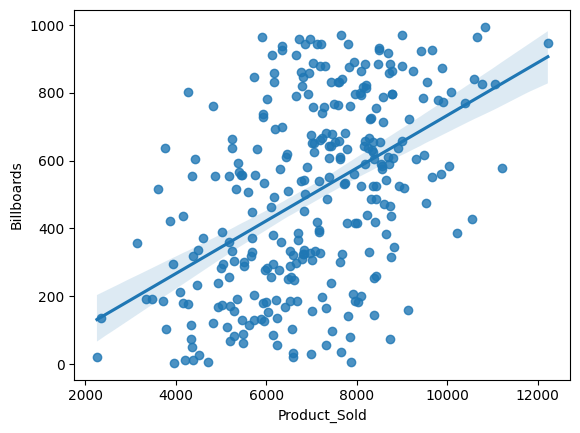

In [16]:
sns.regplot(x = "Product_Sold", y = "Billboards", data = df)

<Axes: xlabel='Product_Sold', ylabel='Social_Media'>

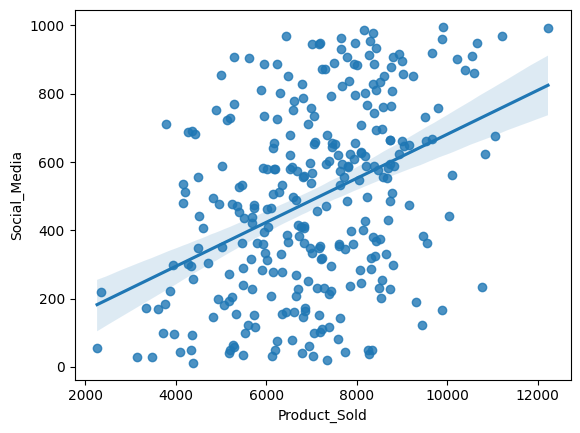

In [17]:
sns.regplot(x = "Product_Sold", y = "Social_Media", data = df)

<Axes: xlabel='Product_Sold', ylabel='Influencer_Marketing'>

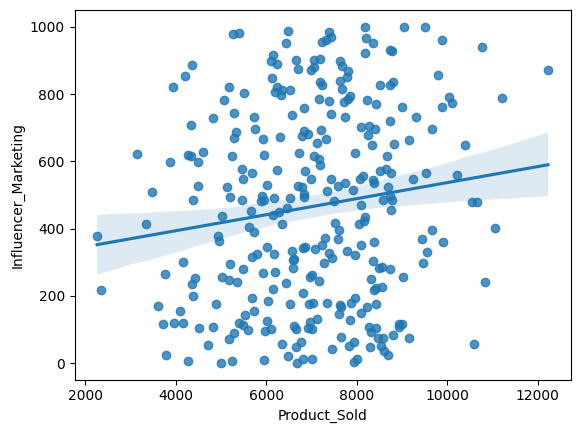

In [18]:
sns.regplot(x = "Product_Sold", y = "Influencer_Marketing", data = df)

<Axes: xlabel='Product_Sold', ylabel='TV'>

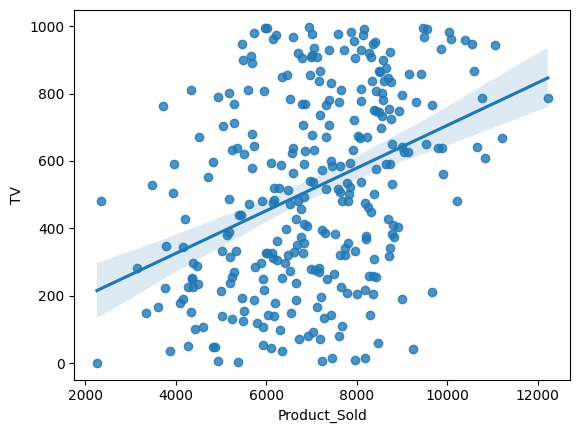

In [19]:
sns.regplot(x = "Product_Sold", y = "TV", data = df)

# Insights

#### The visualizations provide further insights into the findings:

#### Scatter Plots - Advertising Channels vs. Products Sold
Each plot shows the relationship between the spending of a given advertising channel and the corresponding number of products sold. Generally, the more that is spent on advertising, the more products are sold. Channels like Affiliate Marketing and Billboards produce the highest purchase amounts.

#### Correlation Matrix Heatmap 
The heatmap visualizes the correlation coefficients between variables.

Affiliate Marketing has the highest positive correlation with Product Sold, reinforcing its potential effectiveness in driving sales. This analysis suggests that advertising through channels such as Affiliate Marketing, Billboards, and Social Media are positiveley associated with sales. With these insights they can guide further marketing strategies. 